In [30]:
import numpy as np
from imutils import face_utils
import dlib
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

In [31]:
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(f"./imgs/{p}")

In [32]:
def get_points(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
    img = deepcopy(image)
    
    for (x, y) in shape:
        cv2.circle(img, (x, y), 2, (0, 255, 0), -1)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return shape, img

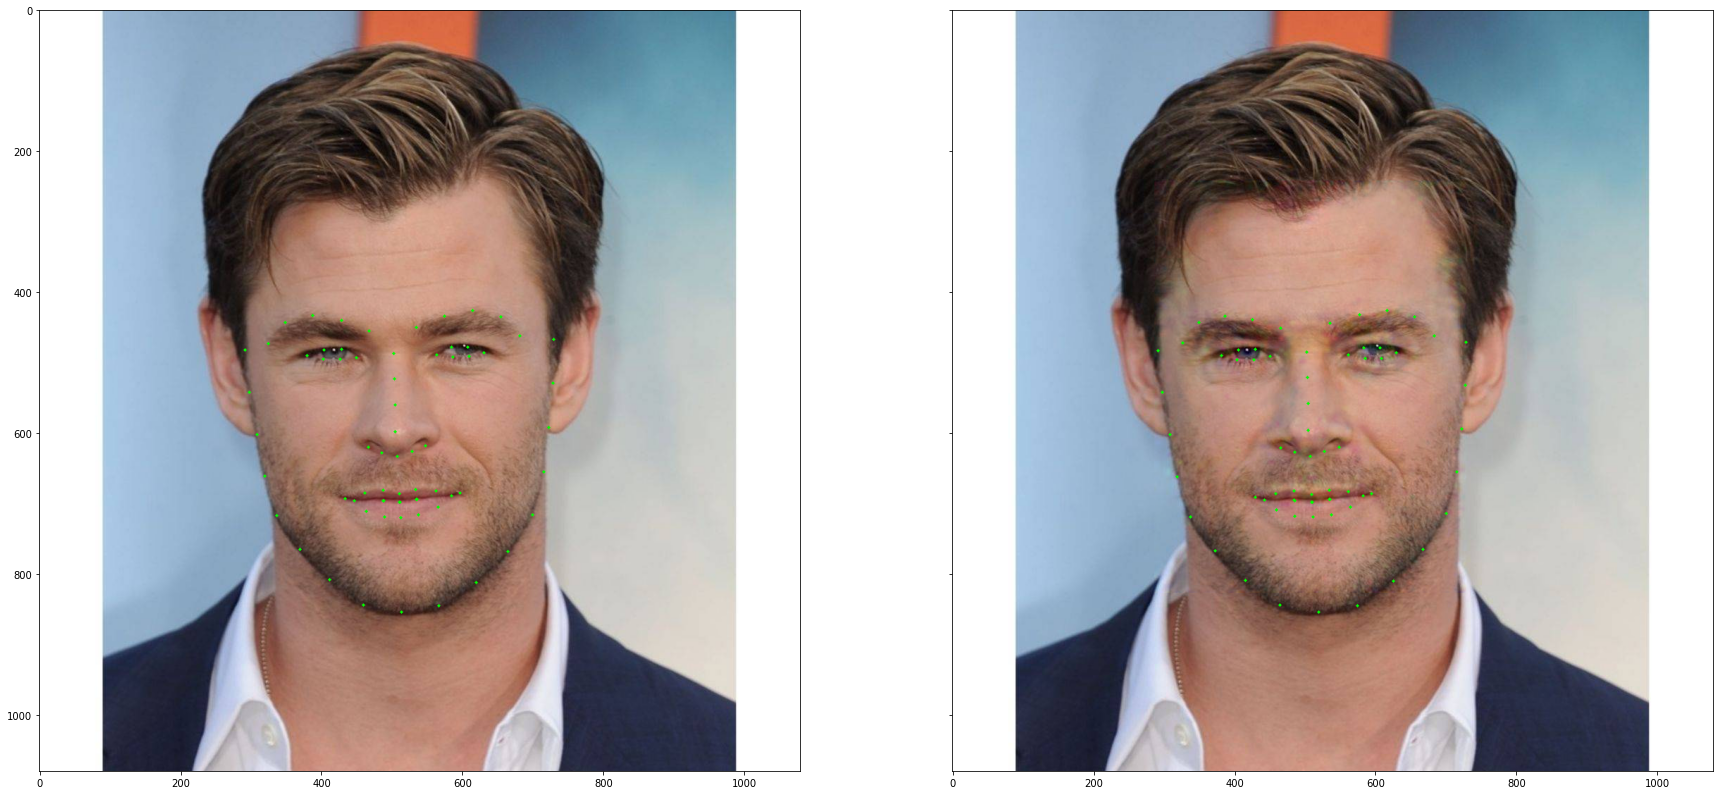

In [36]:
im1 = cv2.imread('./imgs/img4.jpeg')
im2 = cv2.imread('./imgs/img4_cloaked.png')

c1, i1 = get_points(im1)
c2, i2 = get_points(im2)

fig, axs = plt.subplots(1, 2, figsize=(30, 15), sharex=True, sharey=True)

axs[0].imshow(i1)
axs[1].imshow(i2)

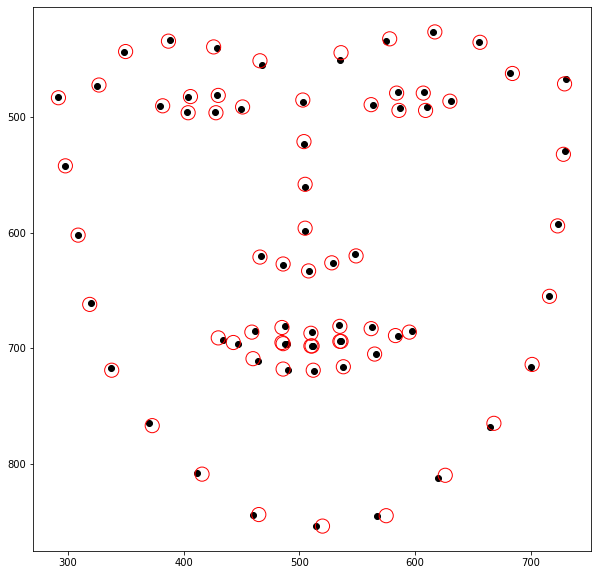

In [34]:
x1, y1 = zip(*c1)
x2, y2 = zip(*c2)
plt.scatter(x1, y1, c='black')
plt.scatter(x2, y2, s=200, facecolors='none', edgecolors='r')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()